In [19]:
from baseline_model import baseline_bicubic
from data_sets_loaders import get_train_val_test_dataloaders
import matplotlib.pyplot as plt
import torch
import numpy as np
from loss_functions import CombinedLoss
from discriminator_model import DiscriminatorModel

cropped_dir = "./cropped_images"
train_dl, val_dl, test_dl = get_train_val_test_dataloaders(100)

total_loss = 0
loss_fn = CombinedLoss(0.0, 1.0, 1.0, 1.0, 4.0)
outputs = []
discriminator = DiscriminatorModel(3, 8, 0.3)

# Loop
for lr_batch, hr_batch in test_dl:
	for i, image in enumerate(lr_batch):
		output = baseline_bicubic(image)
		outputs.append(output)
		loss = loss_fn(output, hr_batch[i], discriminator(output) * 0)
		total_loss += loss
	
print("Loss: " + str(total_loss / len(outputs)))

print("Example Result")
fig = plt.figure()
for lr_batch, hr_batch in test_dl:
	for image in hr_batch:
		fig.add_subplot(1, 2, 1) 
		plt.imshow(np.transpose(image))
		plt.axis('off')
		plt.title("Original High Resolution") 
		fig.add_subplot(1, 2, 2) 
		plt.imshow(np.transpose(outputs))
		plt.axis('off')
		plt.title("Generated High Resolution") 
		break
	break
plt.show()


RuntimeError: requested resize to (128, 128)x3 ((128, 128, 128, 128, 128, 128) elements in total), but the given tensor has a size of 3x128x128 (49152 elements). autograd's resize can only change the shape of a given tensor, while preserving the number of elements. 

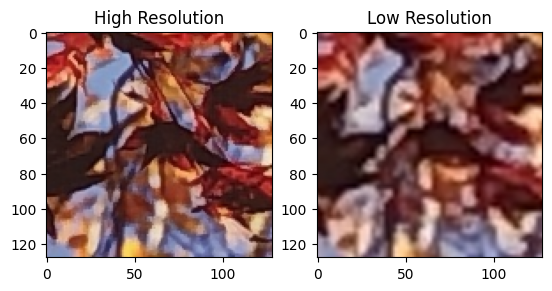

In [18]:
train_dl, val_dl, test_dl = get_train_val_test_dataloaders(100)
fig = plt.figure()

for lr_batch, hr_batch in test_dl:
	for i, image in enumerate(hr_batch):
		fig.add_subplot(1, 2, 1) 
		plt.imshow(np.transpose(image))
		plt.title("High Resolution") 
		fig.add_subplot(1, 2, 2) 
		plt.imshow(np.transpose(lr_batch[i]))
		plt.title("Low Resolution") 
		break
	break
plt.show()